# The Sparks Foundation

# Task-6 - Prediction using Decision Tree Algorithm

By, kavin V

#### Problem Statement:

    Create the Decision Tree classifier and visualize it graphically. If we feed any new data to this classifier, it would   be able to predict the right class accordingly.
    
#### DataSet:

    https://bit.ly/3kXTdox
    
#### Decision Tree Algorithm:

    Decision Tree is a Supervised learning technique that can be used for both classification and Regression problem. A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees. In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.

## Necessary Imports

In [1]:
# Importing Necessary packages

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

In [2]:
# Importing dataset

dataset = pd.read_csv("DataSets/Iris-Task-6.csv")
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Exploratory Data Analysis

In [3]:
# Setting ID columns as index 

dataset = dataset.set_index("Id")
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Extracting basic info

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
# EDA

dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Pre-processing

In [6]:
# Checking for any null values

dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
# Extracting training data

x = dataset.iloc[:,0:-1]
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [8]:
# Extracting training data

y = dataset.iloc[:,-1]
y.head()

Id
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
Name: Species, dtype: object

In [9]:
# getting all unique class values

y.value_counts().keys()

Index(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa'], dtype='object')

In [26]:
# Splitting dataset into train and test

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,stratify=y,test_size=0.3)

## Training the model

In [27]:
#training the model

model = DecisionTreeClassifier()
model.fit(x_train,y_train)

# predicting y label for x test

y_pred = model.predict(x_test)

# calculating high variance accuracy score

print("Accuracy of model : {}%".format(round(metrics.accuracy_score(y_test,y_pred)*100,2)))

Accuracy of model : 91.11%


In [28]:
# calculating low variance accuracy of the model

model = DecisionTreeClassifier()
score = cross_val_score(model,x,y,cv=5)
print("Accuracy of model : {}%".format(round(score.mean()*100,2)))

Accuracy of model : 96.67%


In [29]:
# calculating confusion matrix

print(metrics.confusion_matrix(y_test,y_pred))

[[15  0  0]
 [ 0 13  2]
 [ 0  2 13]]


In [13]:
# printing classification report for examining predicted values

print(metrics.classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



## Visualization 

### 1. Text model :

In [14]:
from sklearn.tree import export_text

model = DecisionTreeClassifier()
model.fit(x_train,y_train)
text = export_text(model)
print(text)

|--- feature_3 <= 0.70
|   |--- class: Iris-setosa
|--- feature_3 >  0.70
|   |--- feature_3 <= 1.55
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.95
|   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.55
|   |   |--- feature_3 <= 1.70
|   |   |   |--- feature_0 <= 6.60
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_0 >  6.60
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_3 >  1.70
|   |   |   |--- feature_2 <= 4.85
|   |   |   |   |--- feature_1 <= 3.00
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- feature_1 >  3.00
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_2 >  4.85
|   |   |   |   |--- class: Iris-virginica



### 2. Using tree_plot :

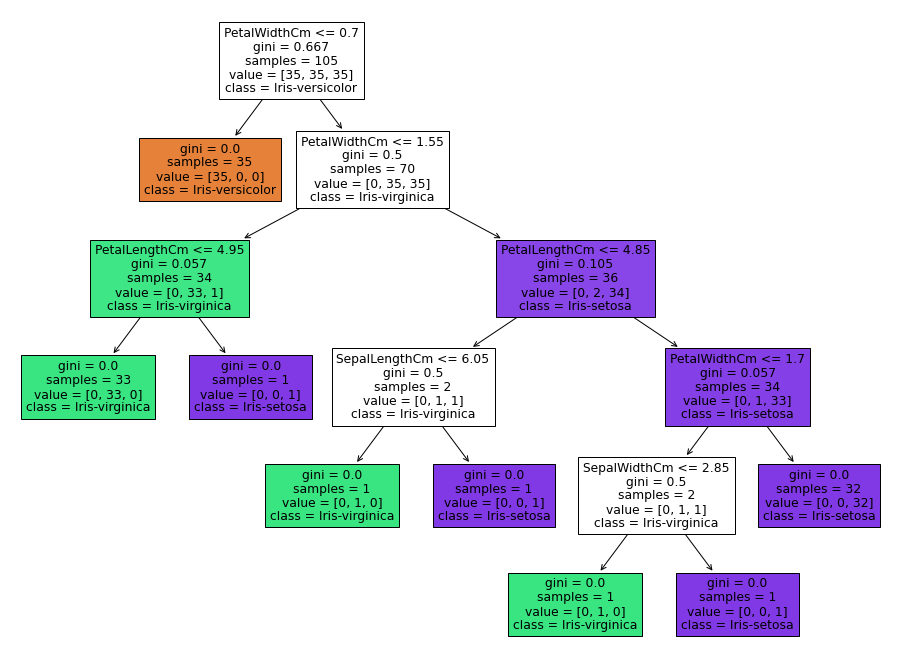

In [15]:
#visualization

model.fit(x_train,y_train)
fn = x.columns
cn = y.value_counts().keys();

plt.figure(figsize=(16,12))
_ = tree.plot_tree(model,filled=True,feature_names=fn,class_names=cn)

### 3. Using graphviz :

In [17]:
#conda install python-graphviz
#dot -Tpng tree.dot -o tree.png

tree.export_graphviz(model,
                     out_file="tree.dot",
                     feature_names = fn, 
                     class_names=cn,
                     filled = True)

<img src="tree.png" style="width:780px;height:700px"/>

========================================================Thank You========================================================